# Data-Driven Organisations 

## Imports

In [1]:
# import pandas module 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Prepare Data

In [2]:
# import header file
df_header = pd.read_excel('data/question_headers.xlsx')  #original
df = pd.read_excel('data/output.xlsx')  #original
# df.dropna()

In [3]:
# df_header.iloc[1].to_list()

In [4]:
df.describe()

Unnamed: 0       resp_id     colle_id  email  first_name  last_name  \
count  138.000000  1.380000e+02        138.0    0.0         0.0        0.0   
mean    69.500000  1.288964e+10  404063954.0    NaN         NaN        NaN   
std     39.981246  4.013827e+06          0.0    NaN         NaN        NaN   
min      1.000000  1.288637e+10  404063954.0    NaN         NaN        NaN   
25%     35.250000  1.288657e+10  404063954.0    NaN         NaN        NaN   
50%     69.500000  1.288914e+10  404063954.0    NaN         NaN        NaN   
75%    103.750000  1.288939e+10  404063954.0    NaN         NaN        NaN   
max    138.000000  1.289784e+10  404063954.0    NaN         NaN        NaN   

       custom_data     d_tools  d_capabilities   d_culture  ...  \
count          0.0  138.000000      138.000000  138.000000  ...   
mean           NaN    4.231884        4.434783    4.362319  ...   
std            NaN    0.856830        0.724509    0.782491  ...   
min            NaN    1.000000        1.000000    1.000000  ...   
25%            NaN    4.000000        4.000000    4.000000  ...   
50%            NaN    4.000000        5.000000    4.000000  ...   
75%            NaN    5.000000        5.000000    5.000000  ...   
max            NaN    5.000000        5.000000    5.000000  ...   

       sy_fairness_to_trust  sy_trust_to_adoption  sy_lack_trust_low_adoption  \
count            136.000000            136.000000                  136.000000   
mean               4.264706              4.551471                    4.595588   
std                0.680254              0.581440                    0.744149   
min                2.000000              2.000000                    1.000000   
25%                4.000000              4.000000                    4.000000   
50%                4.000000              5.000000                    5.000000   
75%                5.000000              5.000000                    5.000000   
max                5.000000              5.000000                    5.000000   

       ai_transparency_to_trust  ai_accountability_to_trust  \
count                135.000000                  134.000000   
mean                   4.081481                    4.365672   
std                    0.970089                    0.710195   
min                    1.000000                    2.000000   
25%                    4.000000                    4.000000   
50%                    4.000000                    4.000000   
75%                    5.000000                    5.000000   
max                    5.000000                    5.000000   

       ai_fairness_to_trust  ai_trust_to_adoption  ai_lack_trust_low_adoption  \
count            135.000000            134.000000                  135.000000   
mean               4.185185              4.485075                    4.562963   
std                0.848046              0.597426                    0.593590   
min                1.000000              3.000000                    2.000000   
25%                4.000000              4.000000                    4.000000   
50%                4.000000              5.000000                    5.000000   
75%                5.000000              5.000000                    5.000000   
max                5.000000              5.000000                    5.000000   

       ai_must_be_trans_expl  ai_fat_to_trust  
count             135.000000       135.000000  
mean                4.466667         4.562963  
std                 0.620544         0.580882  
min                 2.000000         2.000000  
25%                 4.000000         4.000000  
50%                 5.000000         5.000000  
75%                 5.000000         5.000000  
max                 5.000000         5.000000  

[8 rows x 91 columns]

## AI and Trust H

<strong>Metric</strong><br>
The questionnaire provided importance measures in terms of the relationship between FAT and trust, trust and increased adoption and FAT and adoption.
<br>

<img src='images/TOEFAT_H.jpg'>

<strong>Objective H4</strong><br>
Question: In the context of AI. From a product owner perspective, is trustworthiness an important contributor to the adoption of the system.
Check if Trust is an important contributer towards the adoption of AI.
<br>

ai_trust_to_adoption = Extremely important and Very important<br>
ai_trust_not_to_adoption = Somewhat important and Not so important and Not at all important

<strong>Hypothesis</strong><br>
H0: ai_trust_to_adoption - ai_trust_not_to_adoption = 0 <br>
H4: ai_trust_to_adoption - ai_trust_not_to_adoption > 0 <br>  

#### 3.3.0 Prepare data

array([[<AxesSubplot:title={'center':'ai_fairness_to_trust'}>]],
      dtype=object)

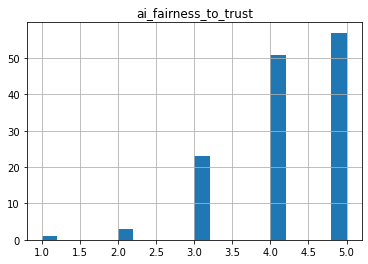

In [5]:
df[['ai_fairness_to_trust']].hist(bins=20)

In [6]:
# create dictionary with mappings
di_isnb = {5: 1, 4: 1, 3: 0, 2: 0, 1: 0}
di_nonb = {5: 0, 4: 0, 3: 1, 2: 1, 1: 1}

# create new dataframe that will be used
df_new = df[['ai_fairness_to_trust']].copy()
df_new.loc[:, 'isnb'] = df_new.loc[:, 'ai_fairness_to_trust']
df_new.loc[:, 'nonb'] = df_new.loc[:, 'ai_fairness_to_trust']

# code data
df_new = df_new.replace({"isnb": di_isnb})
df_new = df_new.replace({"nonb": di_nonb})

# drop na
df_new = df_new.dropna()

# output data
df_new.head()

ai_fairness_to_trust  isnb  nonb
0                   4.0   1.0   0.0
1                   3.0   0.0   1.0
3                   4.0   1.0   0.0
4                   5.0   1.0   0.0
5                   4.0   1.0   0.0

array([[<AxesSubplot:title={'center':'isnb'}>]], dtype=object)

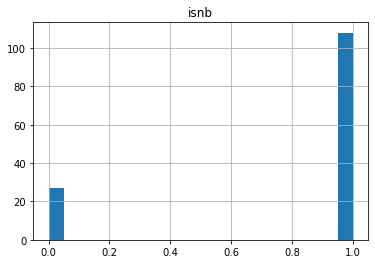

In [7]:
df_new[['isnb']].hist(bins=20)

#### 3.3.1 Computed the observed difference

In [8]:
obs_diff = df_new['isnb'].sum() - df_new['nonb'].sum()
print(obs_diff)

81.0


#### 3.3.2 Simulate the sampling distribution.

In [9]:
# create sampling distribution of difference between number of wins by trained agent vs untrained agent
diffs = []
for _ in range(10000):
    df_sample = df_new.sample(df_new.shape[0], replace = True)
    sample_diff = df_sample['isnb'].sum() - df_sample['nonb'].sum()

    diffs.append(sample_diff)

In [10]:
# convert to numpy array
diffs = np.array(diffs)
diffs.std()

9.39520233097723

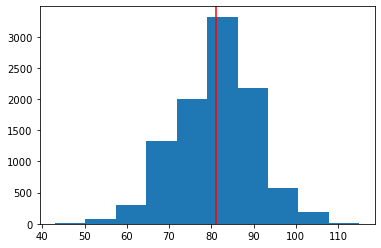

In [11]:
# plot sampling distribution
plt.hist(diffs);
plt.axvline(x=obs_diff, color='red');

#### 3.3.3 Simulate the distribution under the null hypothesis

In [12]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

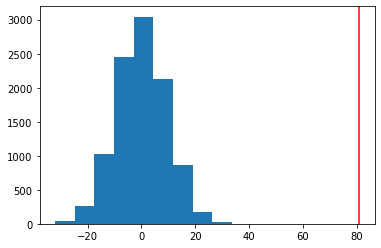

In [13]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(x=obs_diff, color='red');

#### 3.3.4. Compute the p-value 

In [14]:
# compute p value
p_value = (null_vals > obs_diff).mean()
print(p_value)
if p_value > 0:
    print('greater than 0')

0.0


In [15]:
if p_value < 0.01:
    print('reject H0')
else:
    print('fail to reject H0')

reject H0


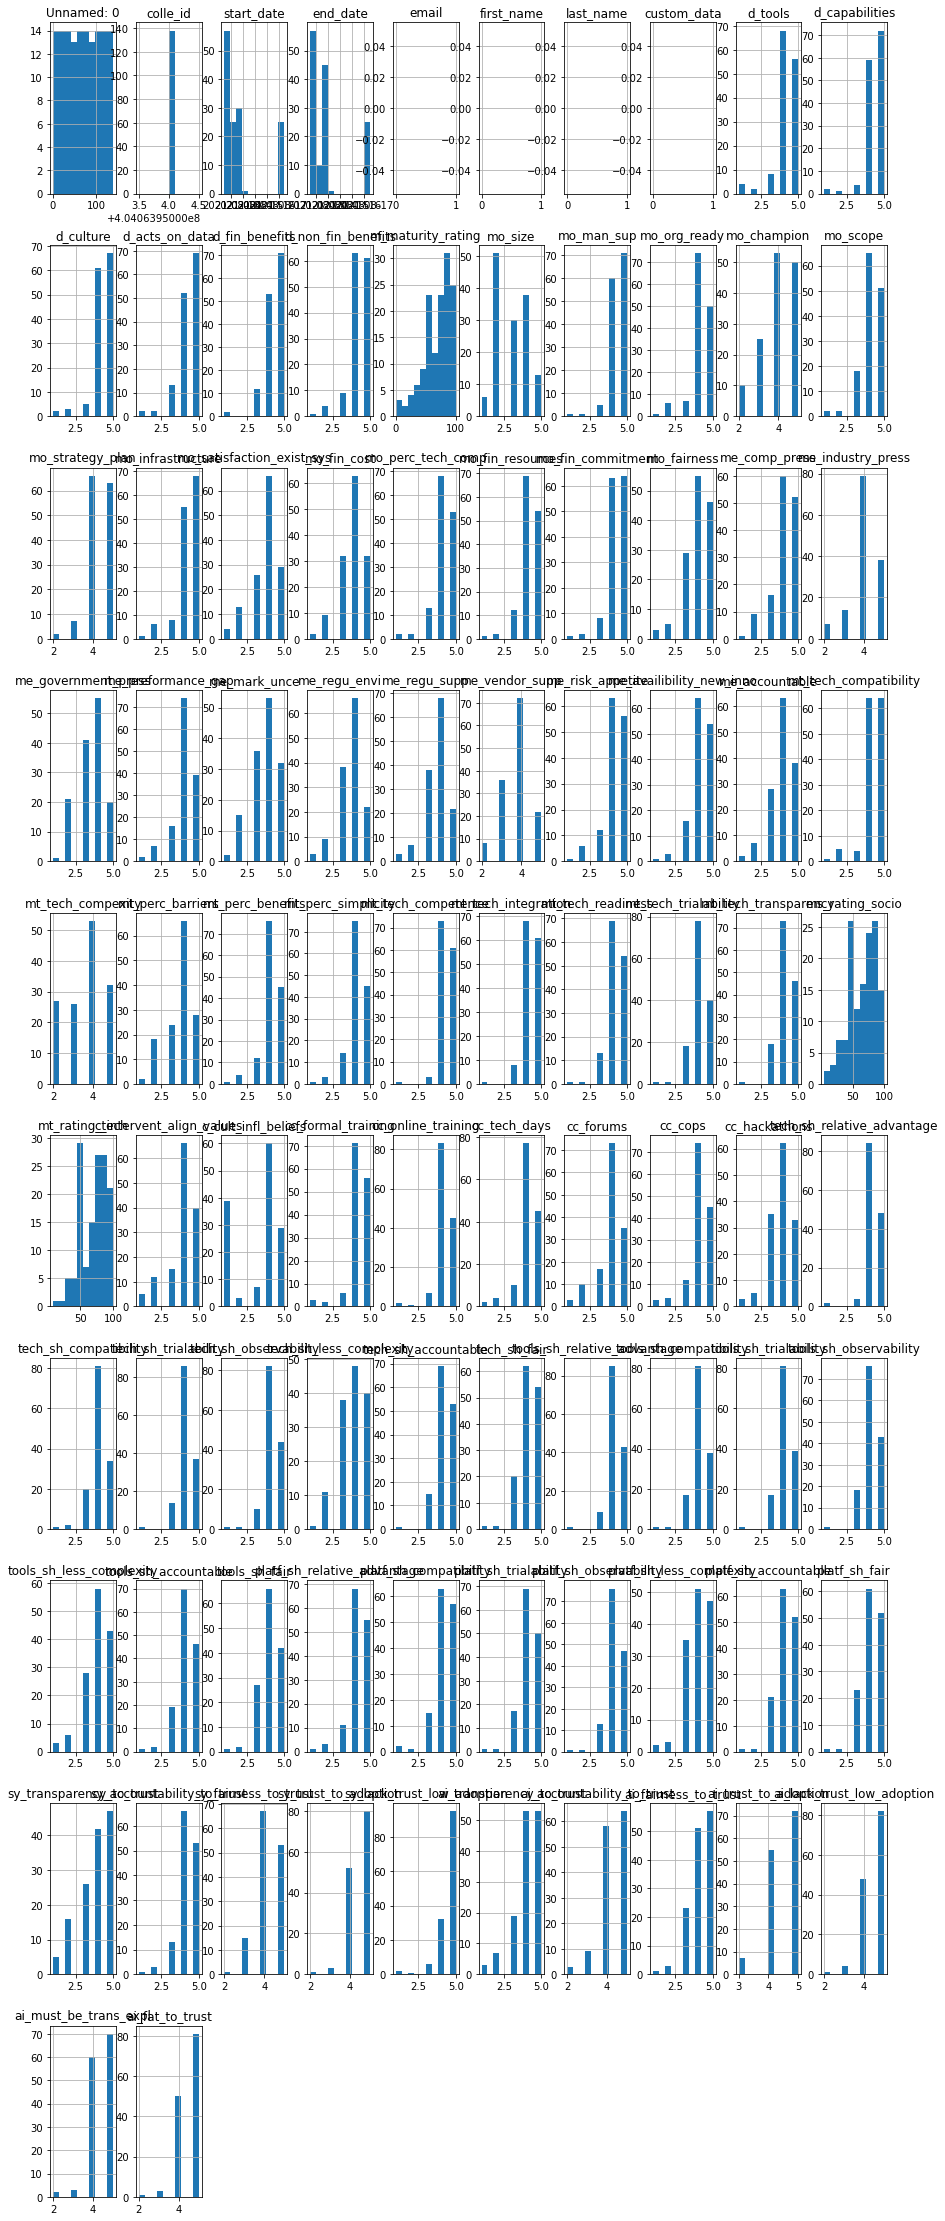

In [16]:
df_corr = df.drop(['resp_id'], axis=1)
df_corr.hist(figsize=(15, 40));

In [17]:
df.corr()

Unnamed: 0   resp_id  colle_id  email  first_name  \
Unnamed: 0                    1.000000 -0.844206       NaN    NaN         NaN   
resp_id                      -0.844206  1.000000       NaN    NaN         NaN   
colle_id                           NaN       NaN       NaN    NaN         NaN   
email                              NaN       NaN       NaN    NaN         NaN   
first_name                         NaN       NaN       NaN    NaN         NaN   
...                                ...       ...       ...    ...         ...   
ai_fairness_to_trust          0.074929 -0.073417       NaN    NaN         NaN   
ai_trust_to_adoption          0.105609 -0.102927       NaN    NaN         NaN   
ai_lack_trust_low_adoption   -0.052121 -0.031400       NaN    NaN         NaN   
ai_must_be_trans_expl         0.015862 -0.051469       NaN    NaN         NaN   
ai_fat_to_trust               0.016768 -0.000620       NaN    NaN         NaN   

                            last_name  custom_data   d_tools  d_capabilities  \
Unnamed: 0                        NaN          NaN  0.095244        0.045106   
resp_id                           NaN          NaN -0.051081       -0.043079   
colle_id                          NaN          NaN       NaN             NaN   
email                             NaN          NaN       NaN             NaN   
first_name                        NaN          NaN       NaN             NaN   
...                               ...          ...       ...             ...   
ai_fairness_to_trust              NaN          NaN  0.074743        0.148120   
ai_trust_to_adoption              NaN          NaN  0.153742        0.092327   
ai_lack_trust_low_adoption        NaN          NaN  0.184582        0.282196   
ai_must_be_trans_expl             NaN          NaN  0.007505        0.064947   
ai_fat_to_trust                   NaN          NaN  0.143525        0.182534   

                            d_culture  ...  sy_fairness_to_trust  \
Unnamed: 0                   0.017965  ...             -0.022488   
resp_id                      0.044831  ...             -0.009642   
colle_id                          NaN  ...                   NaN   
email                             NaN  ...                   NaN   
first_name                        NaN  ...                   NaN   
...                               ...  ...                   ...   
ai_fairness_to_trust         0.269700  ...              0.602168   
ai_trust_to_adoption         0.194956  ...              0.287304   
ai_lack_trust_low_adoption   0.271317  ...              0.393848   
ai_must_be_trans_expl        0.131465  ...              0.330222   
ai_fat_to_trust              0.277253  ...              0.459159   

                            sy_trust_to_adoption  sy_lack_trust_low_adoption  \
Unnamed: 0                              0.012068                   -0.126747   
resp_id                                -0.032343                    0.067846   
colle_id                                     NaN                         NaN   
email                                        NaN                         NaN   
first_name                                   NaN                         NaN   
...                                          ...                         ...   
ai_fairness_to_trust                    0.334526                    0.214486   
ai_trust_to_adoption                    0.542360                    0.390706   
ai_lack_trust_low_adoption              0.427494                    0.437489   
ai_must_be_trans_expl                   0.289464                    0.220288   
ai_fat_to_trust                         0.414758                    0.412622   

                            ai_transparency_to_trust  \
Unnamed: 0                                  0.052506   
resp_id                                     0.013045   
colle_id                                         NaN   
email                                            NaN   
first_name                          

In [18]:
import seaborn as sns

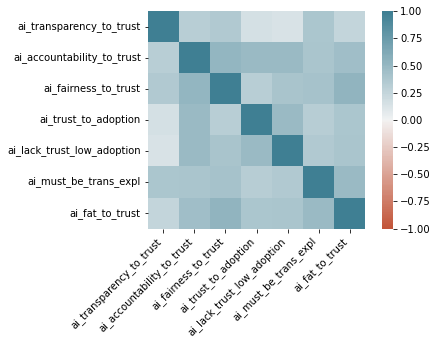

In [19]:
df_ai = df[[
                'ai_transparency_to_trust',
                'ai_accountability_to_trust',
                'ai_fairness_to_trust',
                'ai_trust_to_adoption',
                'ai_lack_trust_low_adoption',
                'ai_must_be_trans_expl',
                'ai_fat_to_trust'    
                ]]




corr = df_ai.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
df_ai.corr()

ai_transparency_to_trust  \
ai_transparency_to_trust                    1.000000   
ai_accountability_to_trust                  0.320118   
ai_fairness_to_trust                        0.353440   
ai_trust_to_adoption                        0.163687   
ai_lack_trust_low_adoption                  0.140061   
ai_must_be_trans_expl                       0.382649   
ai_fat_to_trust                             0.249072   

                            ai_accountability_to_trust  ai_fairness_to_trust  \
ai_transparency_to_trust                      0.320118              0.353440   
ai_accountability_to_trust                    1.000000              0.514501   
ai_fairness_to_trust                          0.514501              1.000000   
ai_trust_to_adoption                          0.476639              0.316880   
ai_lack_trust_low_adoption                    0.490969              0.399172   
ai_must_be_trans_expl                         0.391129              0.415973   
ai_fat_to_trust                               0.447167              0.529098   

                            ai_trust_to_adoption  ai_lack_trust_low_adoption  \
ai_transparency_to_trust                0.163687                    0.140061   
ai_accountability_to_trust              0.476639                    0.490969   
ai_fairness_to_trust                    0.316880                    0.399172   
ai_trust_to_adoption                    1.000000                    0.478761   
ai_lack_trust_low_adoption              0.478761                    1.000000   
ai_must_be_trans_expl                   0.322674                    0.355223   
ai_fat_to_trust                         0.381124                    0.394226   

                            ai_must_be_trans_expl  ai_fat_to_trust  
ai_transparency_to_trust                 0.382649         0.249072  
ai_accountability_to_trust               0.391129         0.447167  
ai_fairness_to_trust                     0.415973         0.529098  
ai_trust_to_adoption                     0.322674         0.381124  
ai_lack_trust_low_adoption               0.355223         0.394226  
ai_must_be_trans_expl                    1.000000         0.487212  
ai_fat_to_trust                          0.487212         1.000000

In [21]:
df

Unnamed: 0      resp_id   colle_id                 start_date  \
0             1  12897837208  404063954 2021-08-17 11:13:06.000000   
1             2  12897754778  404063954 2021-08-17 10:31:55.000000   
2             3  12897751825  404063954 2021-08-17 10:04:39.000001   
3             4  12897749324  404063954 2021-08-17 10:03:00.999999   
4             5  12897725977  404063954 2021-08-17 10:05:33.000000   
..          ...          ...        ...                        ...   
133         134  12886388221  404063954 2021-08-12 11:30:26.999999   
134         135  12886387923  404063954 2021-08-12 11:30:10.000000   
135         136  12886386411  404063954 2021-08-12 11:29:16.000000   
136         137  12886374194  404063954 2021-08-12 11:03:10.000000   
137         138  12886374528  404063954 2021-08-12 11:04:44.000000   

                      end_date     ip_address  email  first_name  last_name  \
0   2021-08-17 12:04:29.000001  160.48.234.77    NaN         NaN        NaN   
1   2021-08-17 11:16:19.999999  160.48.234.77    NaN         NaN        NaN   
2   2021-08-17 11:13:03.000000  160.48.234.77    NaN         NaN        NaN   
3   2021-08-17 11:12:40.000000  160.48.234.78    NaN         NaN        NaN   
4   2021-08-17 11:00:03.000000  160.48.234.78    NaN         NaN        NaN   
..                         ...            ...    ...         ...        ...   
133 2021-08-12 11:30:35.000000  160.48.234.78    NaN         NaN        NaN   
134 2021-08-12 11:30:23.000000  160.48.234.78    NaN         NaN        NaN   
135 2021-08-12 11:29:24.000000  160.48.234.78    NaN         NaN        NaN   
136 2021-08-12 11:21:44.000000  160.48.234.77    NaN         NaN        NaN   
137 2021-08-12 11:21:36.000001  160.48.234.78    NaN         NaN        NaN   

     custom_data  ... sy_trust_to_adoption  sy_lack_trust_low_adoption  \
0            NaN  ...                  4.0                         4.0   
1            NaN  ...                  4.0                         3.0   
2            NaN  ...                  NaN                         NaN   
3            NaN  ...                  5.0                         5.0   
4            NaN  ...                  5.0                         5.0   
..           ...  ...                  ...                         ...   
133          NaN  ...                  NaN                         NaN   
134          NaN  ...                  5.0                         5.0   
135          NaN  ...                  4.0                         4.0   
136          NaN  ...                  3.0                         4.0   
137          NaN  ...                  5.0                         5.0   

     ai_transparency_to_trust  ai_accountability_to_trust  \
0                         4.0                         4.0   
1                         3.0                         4.0   
2                         NaN                         NaN   
3                         4.0                         5.0   
4                         3.0                         5.0   
..                        ...                         ...   
133                       NaN                         NaN   
134                       5.0                         5.0   
135                       4.0                         5.0   
136                       4.0                         3.0   
137                       5.0                         5.0   

     ai_fairness_to_trust  ai_trust_to_adoption  ai_lack_trust_low_adoption  \
0                     4.0                   4.0                         4.0   
1                     3.0                   4.0                         2.0   
2                     NaN                   NaN                         NaN   
3                     4.0                   4.0                         5.0   
4                     5.0                   5.0                         5.0   
..                    ...                   ...                         ...   
133                   NaN               

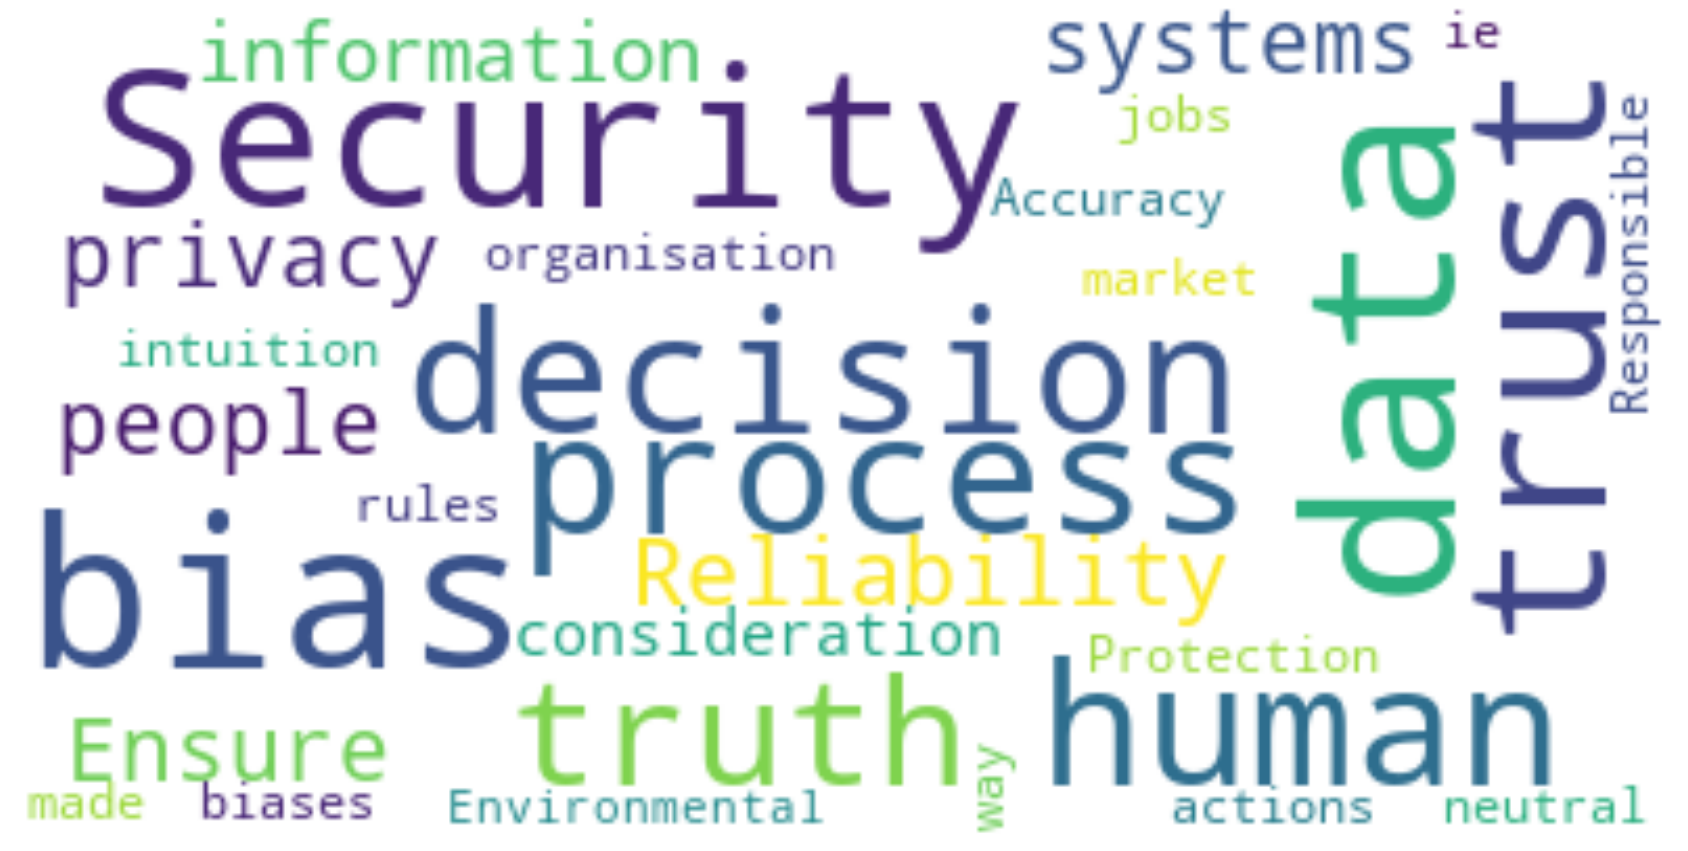

In [22]:
# function to create word cloud 
def create_wordcloud(df_cloud, i_column):
    """ 
    creates a wordcload based on a dataframe column as input. 

    Parameters: 
    df_main (data frame): dataframe containing data
    i_column (string): Column 

    Returns: 
    int: wordcloud

    """
    
    
# get the text of what BIA tools are used
    df_text = df_cloud.dropna(subset=[i_column]) 
    df_text = df_text[i_column]

    # take dataframe and put in text
    text = " ".join(itext for itext in df_text)

    stopwords = set(STOPWORDS)
    stopwords.update(["AI", "system", "organization", 'application', 'one',  "will", "need", 'without', 'something', 'make',
                       'based', 'stay', 'add', 'day', 'still'])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=30, background_color="white").generate(text)

    # Display the generated image:
    plt.figure(figsize=(30, 20))    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
create_wordcloud(df, 'ai_ethical_considerations')    

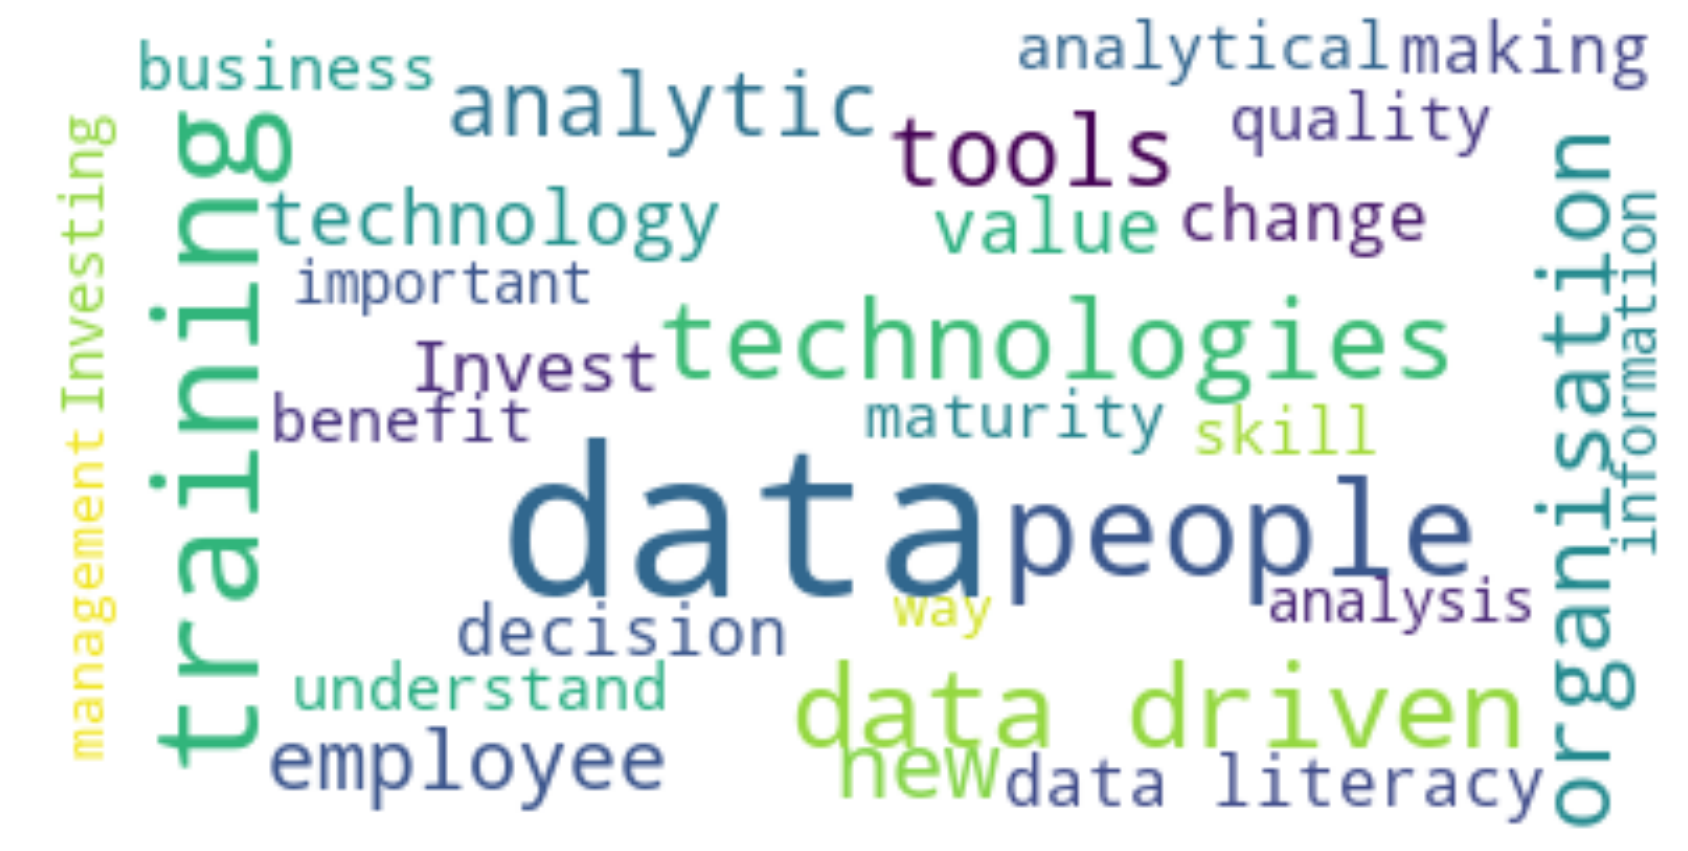

In [23]:
create_wordcloud(df, 'm_how_to_improve')    

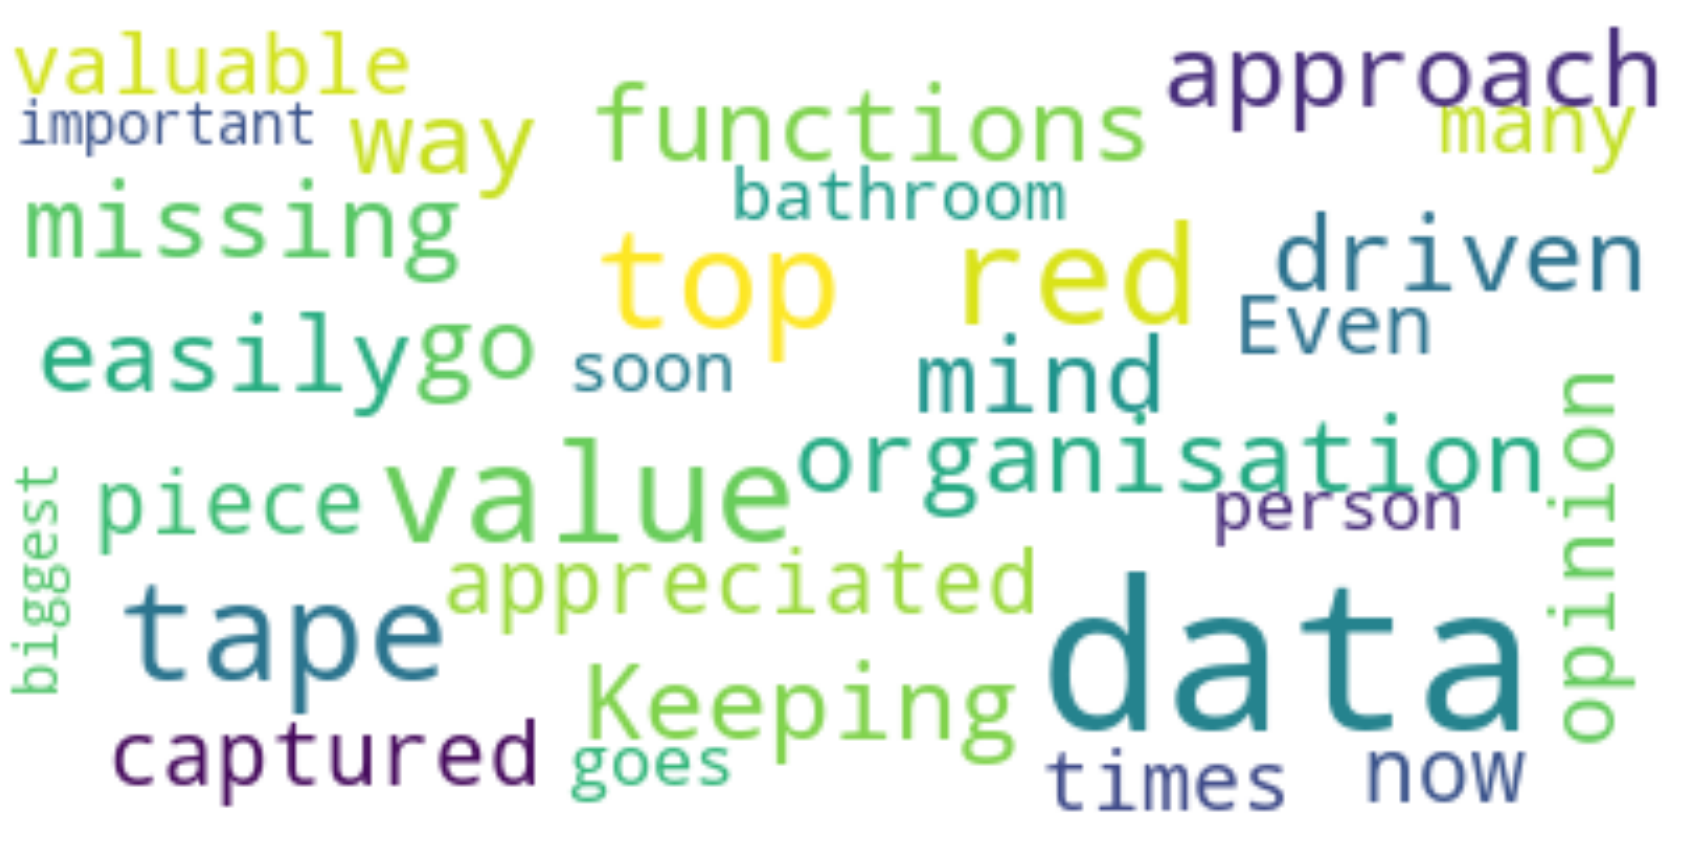

In [24]:
create_wordcloud(df, 'mo_others')   

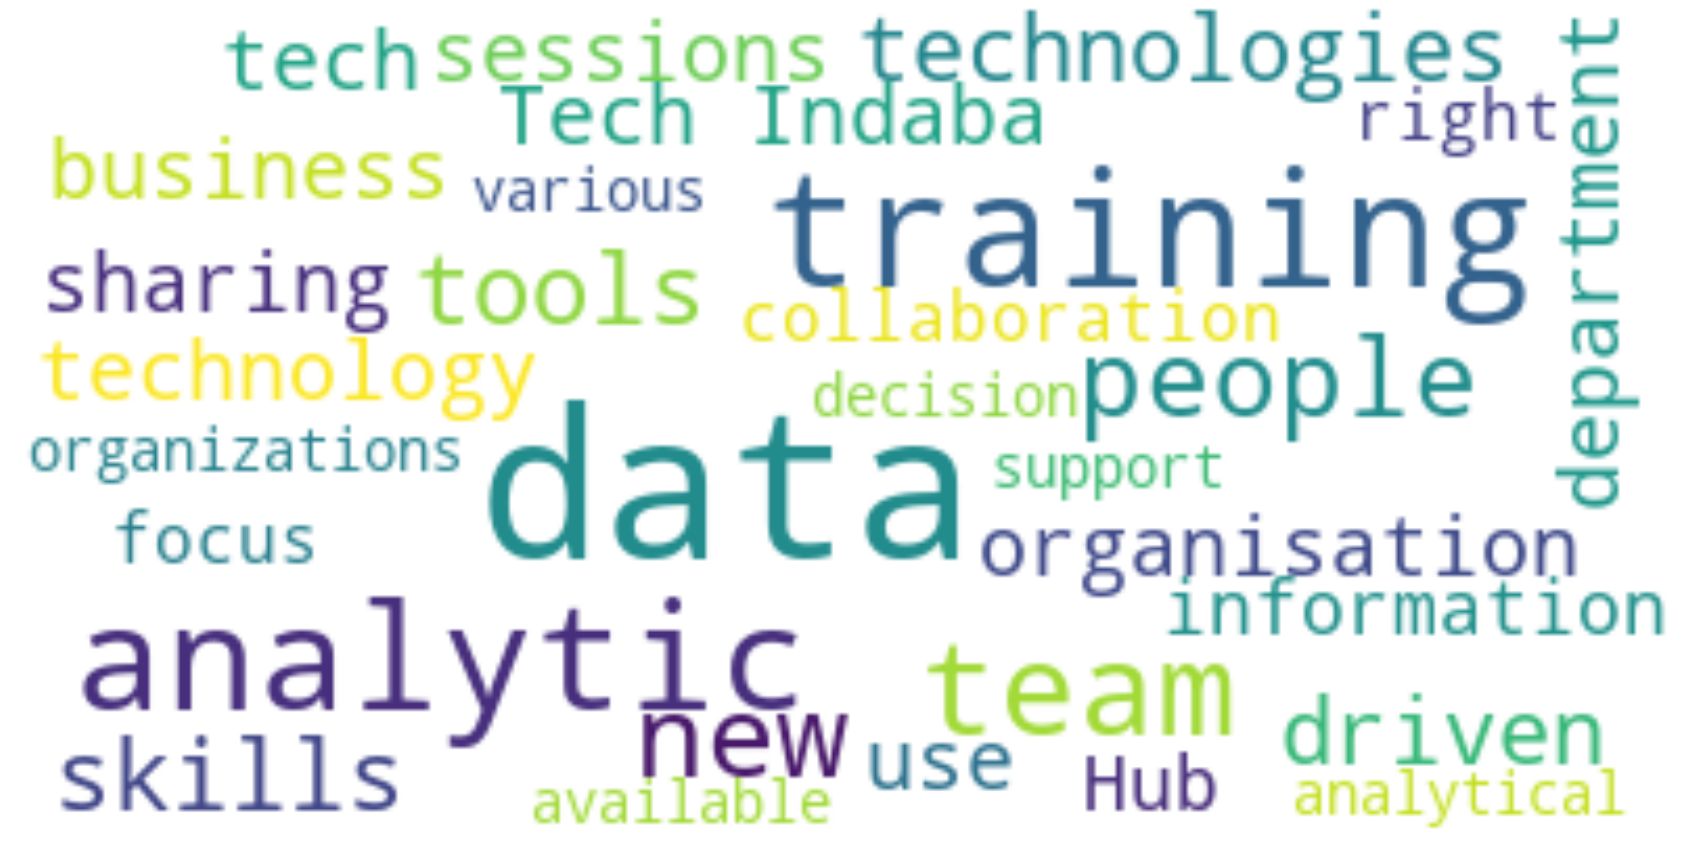

In [25]:
create_wordcloud(df, 'ms_what_doing_to_improve')   

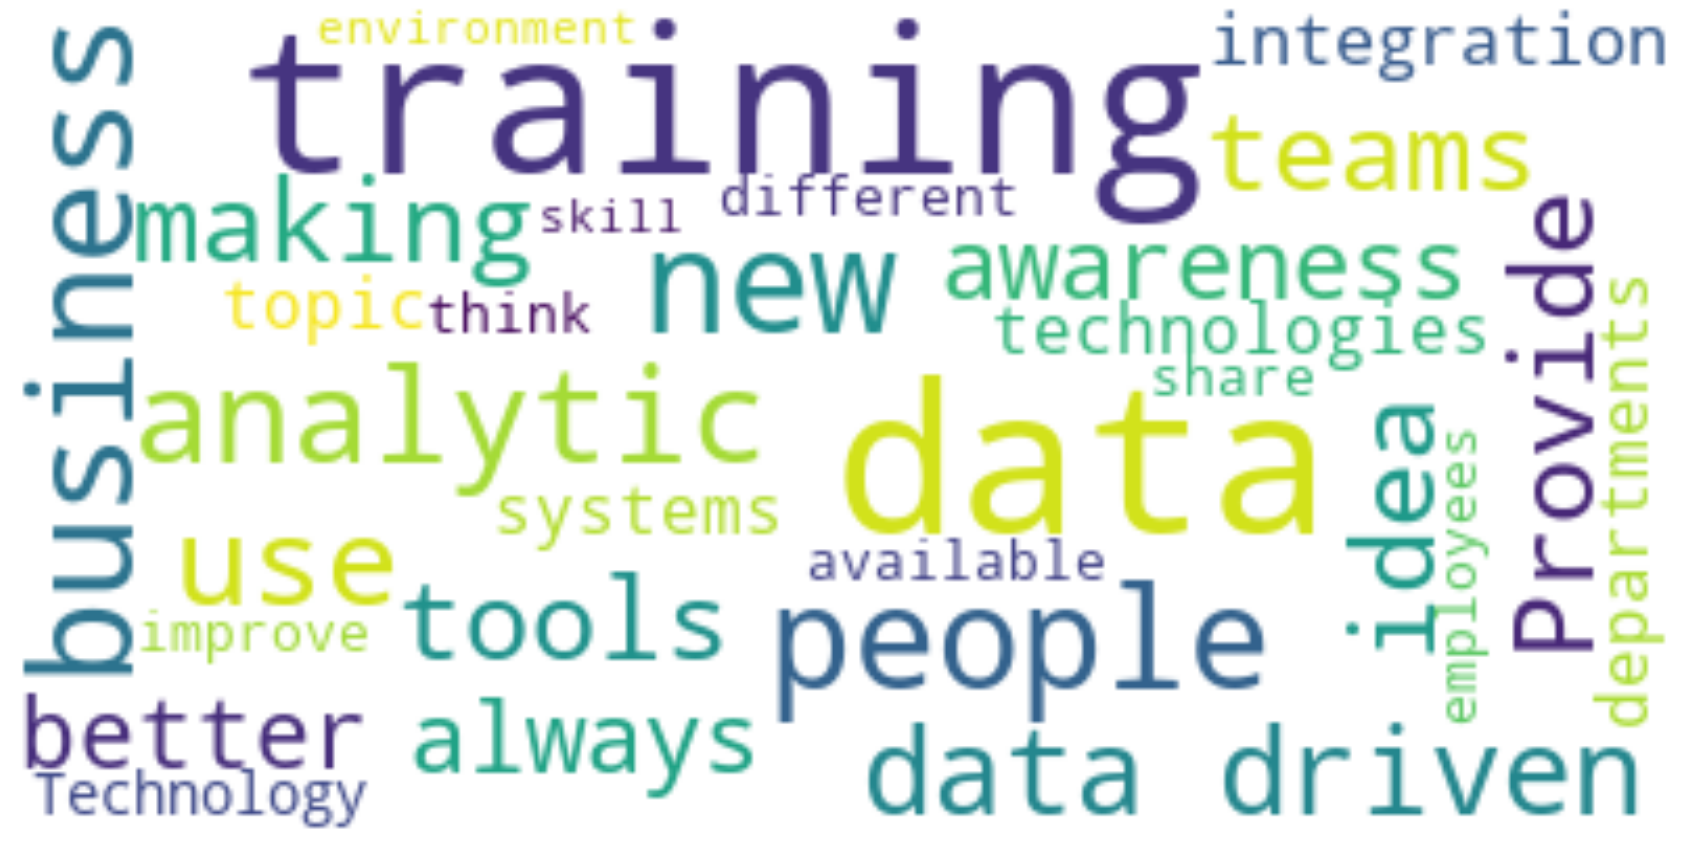

In [26]:
create_wordcloud(df, 'ms_what_can_improve')   

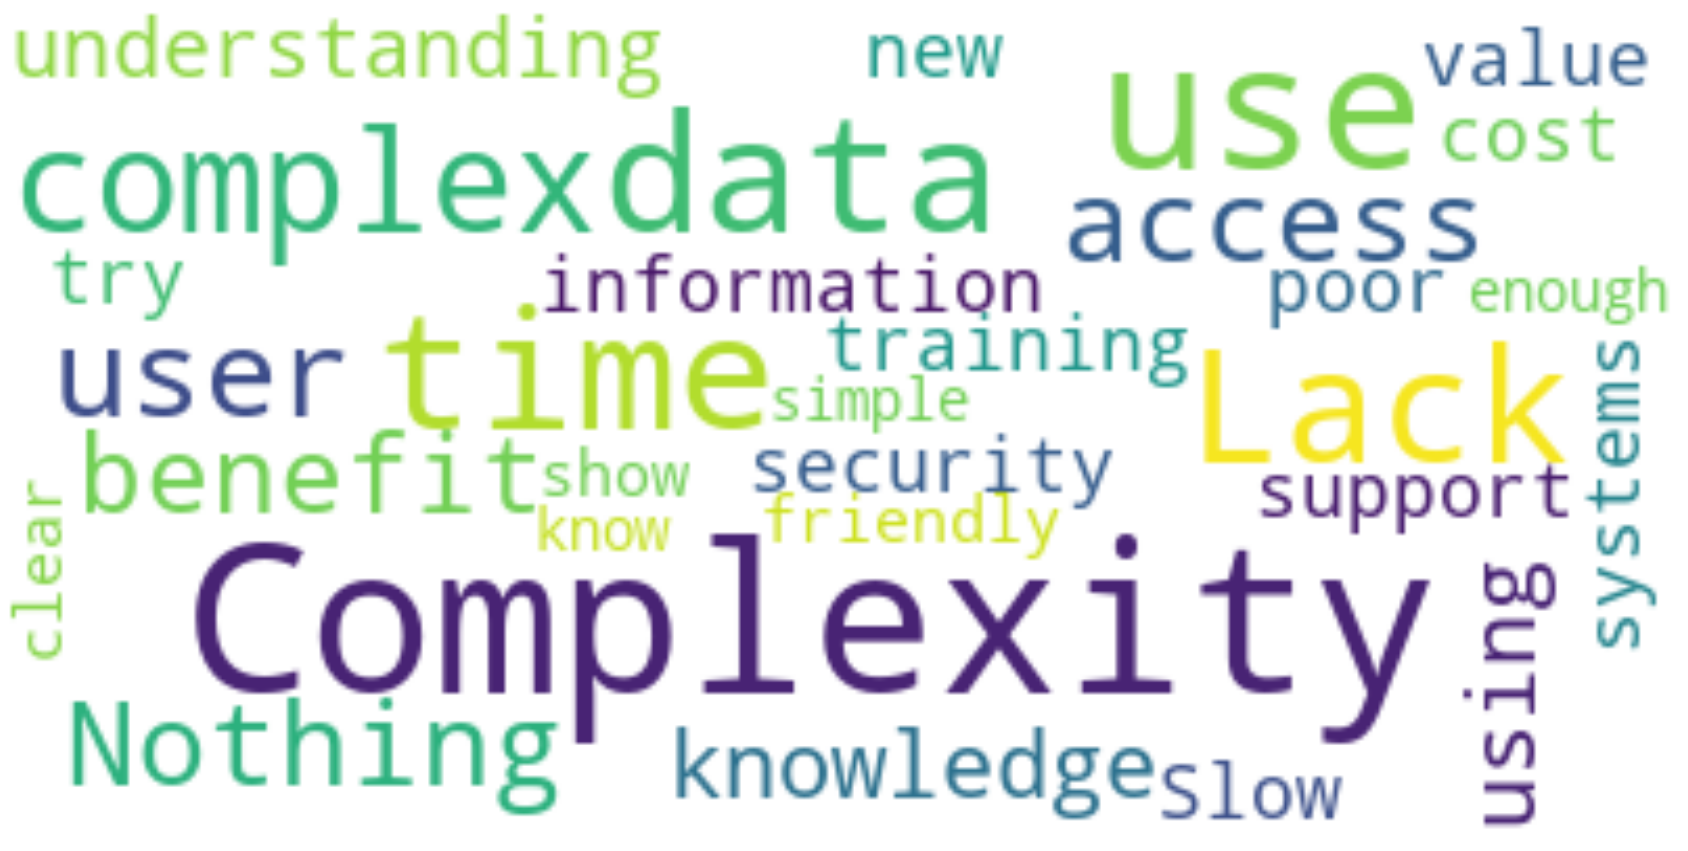

In [27]:
create_wordcloud(df, 'what_would_prevent_usage')   

In [28]:
df_ai = df[[
                'ai_transparency_to_trust',
                'ai_accountability_to_trust',
                'ai_fairness_to_trust',
                'ai_trust_to_adoption',
                'ai_lack_trust_low_adoption',
                'ai_must_be_trans_expl',
                'ai_fat_to_trust'    
                ]]




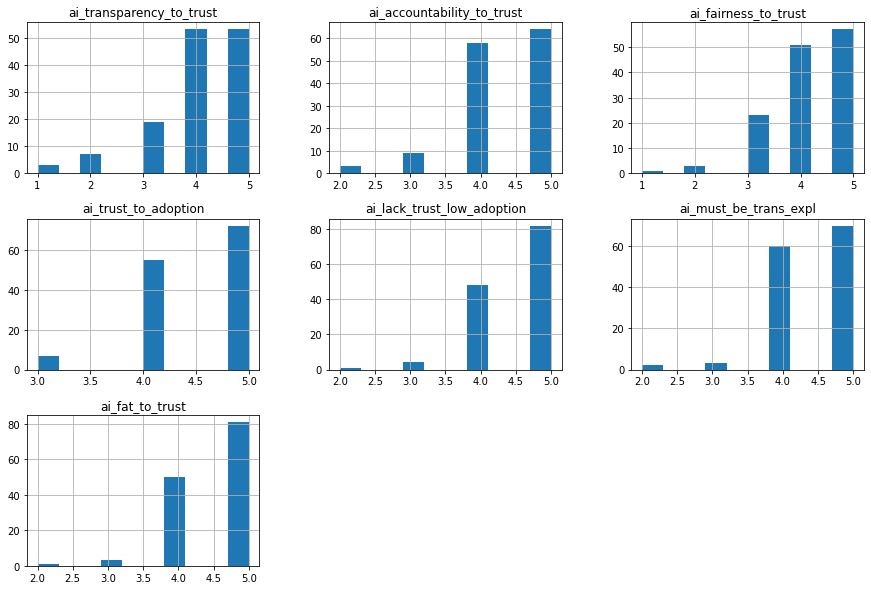

In [29]:
df_ai.hist(figsize=(15, 10));

In [30]:
# df.loc[:, ['Collector ID'] ]
df.iloc[0:1, 110:] == 'Open-Ended Response'

adv_of_data_driven  how_to_compatibility_of_tech  how_to_reduce_compexity  \
0               False                         False                    False   

   how_to_incr_trialability  how_to_advant_visible  what_would_prevent_usage  \
0                     False                  False                     False   

   sy_transparency_to_trust  sy_accountability_to_trust  sy_fairness_to_trust  \
0                     False                       False                 False   

   sy_trust_to_adoption  sy_lack_trust_low_adoption  ai_transparency_to_trust  \
0                 False                       False                     False   

   ai_accountability_to_trust  ai_fairness_to_trust  ai_trust_to_adoption  \
0                       False                 False                 False   

   ai_lack_trust_low_adoption  ai_must_be_trans_expl  \
0                       False                  False   

   ai_ethical_considerations  ai_fat_to_trust  
0                      False            False

In [31]:
def plot_q_feedback(icolumn, df_main):
    """ 
    plot the data of a spesific dataframe columnn

    prepare the data for plotting and plotting the datya 

    Parameters: 
    icolumn (string): the column that needs to be plotted
    df_main (dataframe): the dataframe that is used

    Returns: 
    a bar plotted

    """    
    # prepare data    
    quest_vals = df_main.groupby(icolumn)['Respondent ID'].nunique() # get unique value
    quest_vals = quest_vals.to_frame()                               # convert to a dataframe
    quest_vals['temp'] = quest_vals.index                            # prepare the table for display
    quest_vals['code'] = quest_vals['temp'].map(codes_dict['Code'])  # prepare the table for display
    quest_vals = quest_vals.sort_values(by=['code'])                 # sort the data for display
        
    # plot the figure
    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_axes([0,0,1,1])
    X = quest_vals.iloc[:,1]                       #very good, excelent etc
    Y = quest_vals.iloc[:,0]
    ax.bar(X,Y)
    plt.title(df_columns[df_columns['Short Name'] == icolumn].index.tolist()[0]);
    plt.show();

In [32]:
df.columns[0]

'Unnamed: 0'

In [33]:
# df[['Custom Data 1']]


df['Custom Data 1'].unique()

KeyError: 'Custom Data 1'